In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
#Read in background and perturbation CSV files
ur_perturbs = pd.read_csv('ur_10kperturbs.csv')
ur_perturbs['Circuit'] = 'Upstream Repression'
da_perturbs = pd.read_csv('da_10kperturbs.csv')
da_perturbs['Circuit'] = 'Downstream Activation'
dc_perturbs = pd.read_csv('dc_10kperturbs.csv')
dc_perturbs['Circuit'] = 'Dual Control'
nc_perturbs = pd.read_csv('nc_10kperturbs.csv')
nc_perturbs['Circuit'] = 'Open Loop'
nc_background = pd.read_csv('nc_background.csv')
nc_background['Circuit'] = 'Open Loop'
dc_background = pd.read_csv('dc_background.csv')
dc_background['Circuit'] = 'Dual Control'
da_background = pd.read_csv('da_background.csv')
da_background['Circuit'] = 'Downstream Activation'
ur_background = pd.read_csv('ur_background.csv')
ur_background['Circuit'] = 'Upstream Repression'


In [18]:
#Combine dataframes for t-SNE and visualization
background = pd.concat([ur_background, da_background, dc_background, nc_background])
background['perturb_flag'] = False
perturbs = pd.concat([ur_perturbs, da_perturbs, dc_perturbs, nc_perturbs])
perturbs['perturb_flag'] = True
landscape = pd.concat([background[['loss', 'k1', 'k2' ,'theta1', 'theta2', 'Circuit', 'perturb_flag']], perturbs[['loss', 'k1', 'k2' ,'theta1', 'theta2', 'Circuit', 'perturb_flag']]])

In [4]:
features = ['k1', 'k2', 'theta1', 'theta2']

x = landscape.loc[:, features].values

#Normalize features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])
landscape['pc1'] = principalComponents[:,0]
landscape['pc2'] = principalComponents[:,1]


tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, init='pca')
tsne_results = tsne.fit_transform(x)
landscape['tsne1'] = tsne_results[:,0]
landscape['tsne2'] = tsne_results[:,1]

/Users/charlotte/opt/anaconda3/envs/sundials/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 26644 samples in 0.011s...
[t-SNE] Computed neighbors for 26644 samples in 0.708s...
[t-SNE] Computed conditional probabilities for sample 1000 / 26644
[t-SNE] Computed conditional probabilities for sample 2000 / 26644
[t-SNE] Computed conditional probabilities for sample 3000 / 26644
[t-SNE] Computed conditional probabilities for sample 4000 / 26644
[t-SNE] Computed conditional probabilities for sample 5000 / 26644
[t-SNE] Computed conditional probabilities for sample 6000 / 26644
[t-SNE] Computed conditional probabilities for sample 7000 / 26644
[t-SNE] Computed conditional probabilities for sample 8000 / 26644
[t-SNE] Computed conditional probabilities for sample 9000 / 26644
[t-SNE] Computed conditional probabilities for sample 10000 / 26644
[t-SNE] Computed conditional probabilities for sample 11000 / 26644
[t-SNE] Computed conditional probabilities for sample 12000 / 26644
[t-SNE] Computed conditional probabilities for sa

/Users/charlotte/opt/anaconda3/envs/sundials/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.549484
[t-SNE] KL divergence after 300 iterations: 3.612296


In [8]:
orders = ['Open Loop', 'Upstream Repression', 'Downstream Activation', 'Dual Control']
palette = {'Open Loop': sns.color_palette()[3], 'Upstream Repression': sns.color_palette()[1], 'Downstream Activation': sns.color_palette()[2], 'Dual Control': sns.color_palette()[0], 'Initial':'black'}


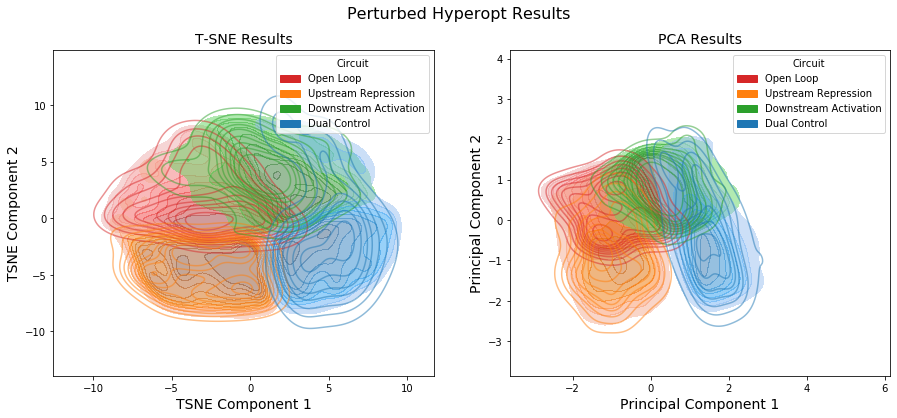

In [10]:
background_plot = landscape.loc[landscape.perturb_flag == False].reset_index(drop=True).sort_values(by='Circuit')
perturb_plot = landscape.loc[landscape.perturb_flag == True].reset_index(drop=True).sort_values(by='Circuit')

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

endpoint = 'T-SNE Results'
ax = axs[0]
sns.kdeplot(
    data=background_plot,
    x="tsne1",
    y="tsne2",
    hue='Circuit',
    thresh=.1, ax=ax, alpha=0.5, hue_order=orders, palette=palette
)

sns.kdeplot(
    data=perturb_plot,
    x="tsne1",
    y="tsne2",
    hue='Circuit', fill=True,
    thresh=.1, ax=ax, alpha=0.5, hue_order=orders, palette=palette
)

ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('TSNE Component 1', fontsize=14)
ax.set_ylabel('TSNE Component 2', fontsize=14)


endpoint = 'PCA Results'
ax = axs[1]
sns.kdeplot(
    data=background_plot,
    x="pc1",
    y="pc2",
    hue='Circuit',
    thresh=.1, ax=ax, alpha=0.5, hue_order=orders, palette=palette
)

sns.kdeplot(
    data=perturb_plot,
    x="pc1",
    y="pc2",
    hue='Circuit', fill=True,
    thresh=.1, ax=ax, alpha=0.5, hue_order=orders, palette=palette
)
ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)
fig.suptitle('Perturbed Hyperopt Results', fontsize=16)
fig.savefig('perturbed_results_density_allcircuits_correctcolors')

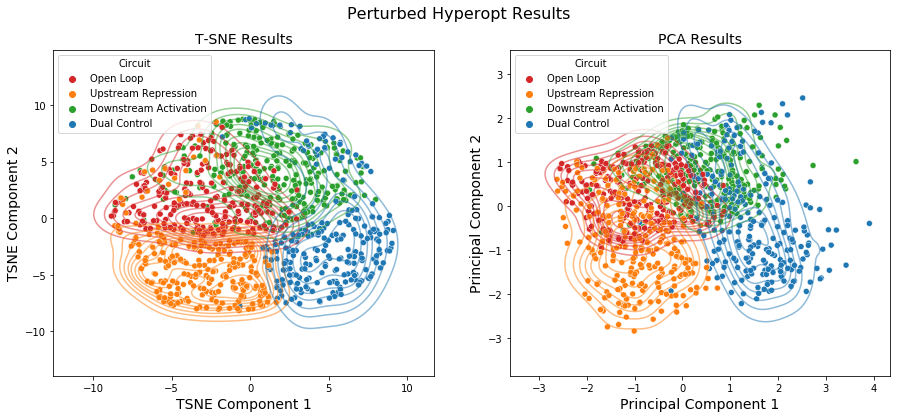

In [13]:
perturb_plot_sample = perturb_plot.sample(1000).sort_values(by='Circuit')
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

endpoint = 'T-SNE Results'
ax = axs[0]
sns.kdeplot(
    data=background_plot,
    x="tsne1",
    y="tsne2",
    hue='Circuit',
    thresh=.1, ax=ax, alpha=0.5, hue_order=orders, palette=palette
)

sns.scatterplot(
    data=perturb_plot_sample,
    x="tsne1",
    y="tsne2",
    hue='Circuit', ax=ax, hue_order=orders, palette=palette
)

ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('TSNE Component 1', fontsize=14)
ax.set_ylabel('TSNE Component 2', fontsize=14)


endpoint = 'PCA Results'
ax = axs[1]
sns.kdeplot(
    data=background_plot,
    x="pc1",
    y="pc2",
    hue='Circuit',
    thresh=.1, ax=ax, alpha=0.5, hue_order=orders, palette=palette
)

sns.scatterplot(
    data=perturb_plot_sample,
    x="pc1",
    y="pc2",
    hue='Circuit', ax=ax, hue_order=orders, palette=palette
)

ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)
fig.suptitle('Perturbed Hyperopt Results', fontsize=16)
fig.savefig('perturbed_results_scatter_1000_allcircuits_correctcolors')

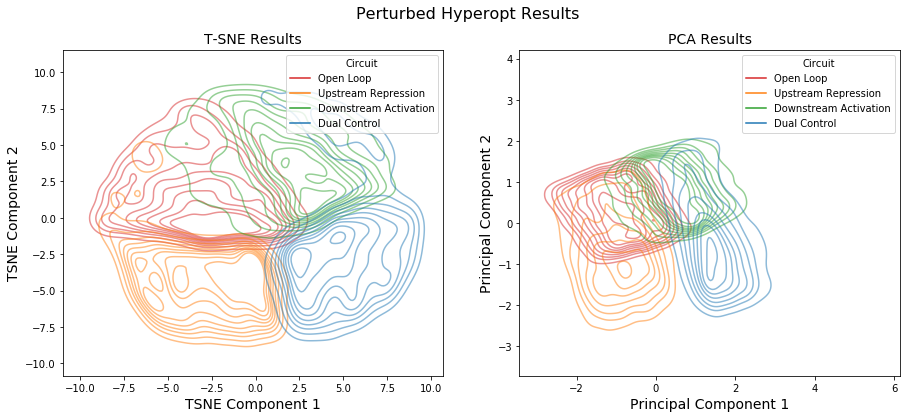

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

endpoint = 'T-SNE Results'
ax = axs[0]
sns.kdeplot(
    data=perturb_plot,
    x="tsne1",
    y="tsne2",
    hue='Circuit',
    thresh=.1, ax=ax, alpha=0.5, hue_order=orders, palette=palette
)

ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('TSNE Component 1', fontsize=14)
ax.set_ylabel('TSNE Component 2', fontsize=14)


endpoint = 'PCA Results'
ax = axs[1]
sns.kdeplot(
    data=perturb_plot,
    x="pc1",
    y="pc2",
    hue='Circuit',
    thresh=.1, ax=ax, alpha=0.5, hue_order=orders, palette=palette
)

ax.set_title(f'{endpoint}', fontsize=14)
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)
fig.suptitle('Perturbed Hyperopt Results', fontsize=16)
fig.savefig('perturbed_results_density_perturbedonly_correctcolors')

In [59]:
from scipy.special import kl_div
from scipy.spatial import distance
#np.cov
# perturbs_list= perturbs.reset_index(drop=True).k1.tolist()
# np.cov(perturbs_list)
def uneven_kl_divergence(pk,qk):
    if len(pk)<len(qk):
        pk = np.random.choice(pk,len(qk))
    elif len(qk)<len(pk):
        qk = np.random.choice(qk,len(pk))
    return np.sum(kl_div(pk, qk))
    #return np.sum(pk * np.log(pk/qk))

In [63]:
circuits = ['Dual Control',  'Downstream Actiation','Upstream Repression' , 'Open Loop']
for c in circuits:
    print(c)
    perturb_c = perturbs.loc[perturbs.Circuit == c]
    background_c = background.loc[background.Circuit == c]
    print(round(uneven_kl_divergence(background_c.k2, perturb_c.k2), 3))
    print(round(uneven_kl_divergence(perturb_c.k2, background_c.k2), 3))

Dual Control
0.022
0.023
Downstream Actiation
0.0
0.0
Upstream Repression
0.005
0.006
Open Loop
0.007
0.008


In [49]:
landscape = landscape.reset_index(drop=True)
landscape['Dataset'] = ['Perturbed' if landscape.perturb_flag[i] == True else 'Background' for i in range(len(landscape))]

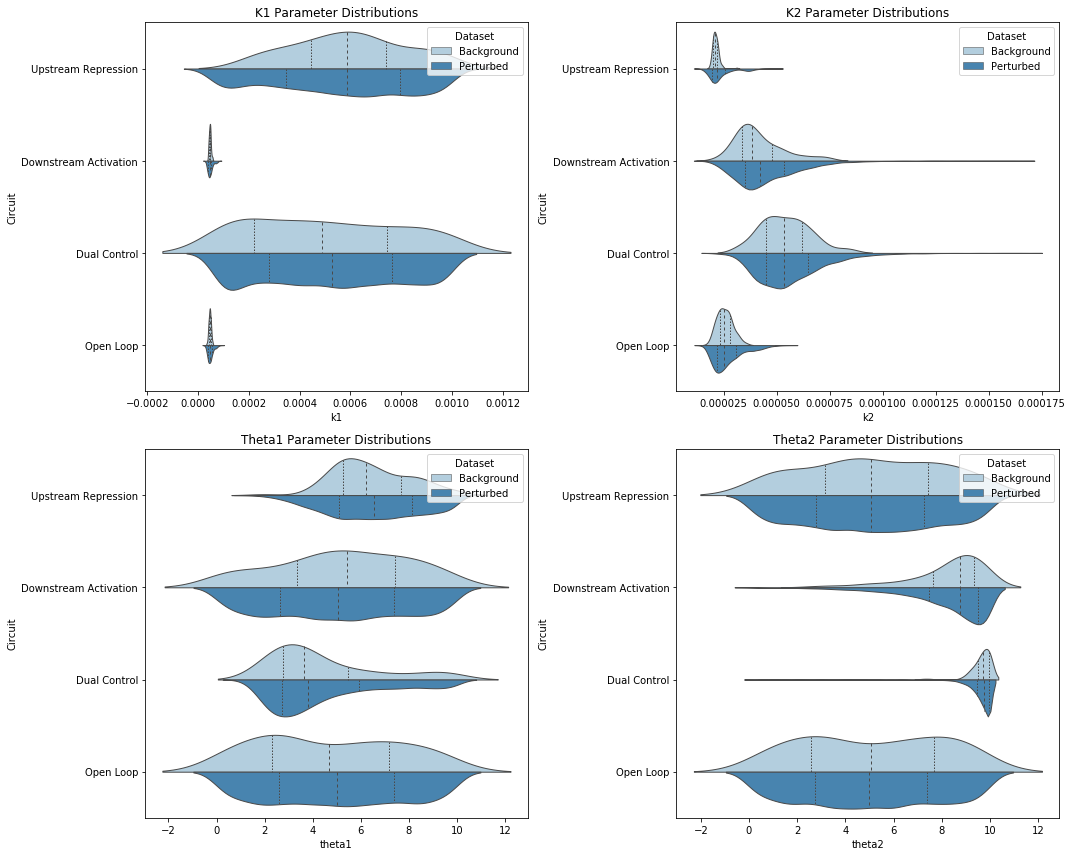

In [62]:
#Compute standard deviation/box plots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
ax = axs[0][0]
sns.violinplot(data=landscape, x="k1", y="Circuit", hue="Dataset",
               split=True, inner="quart", linewidth=1, palette = 'Blues', ax=ax)
ax.set_title('K1 Parameter Distributions')

ax = axs[0][1]
sns.violinplot(data=landscape, x="k2", y="Circuit", hue="Dataset",
               split=True, inner="quart", linewidth=1, palette = 'Blues', ax=ax)
ax.set_title('K2 Parameter Distributions')

ax = axs[1][0]
sns.violinplot(data=landscape, x="theta1", y="Circuit", hue="Dataset",
               split=True, inner="quart", linewidth=1, palette = 'Blues', ax=ax)
ax.set_title('Theta1 Parameter Distributions')

ax = axs[1][1]
sns.violinplot(data=landscape, x="theta2", y="Circuit", hue="Dataset",
               split=True, inner="quart", linewidth=1, palette = 'Blues', ax=ax)
ax.set_title('Theta2 Parameter Distributions')

fig.tight_layout()

In [63]:
perturb_plot.loc[perturb_plot.Circuit =='Dual Control'].std()[['k1', 'k2', 'theta1', 'theta2']]

/var/folders/fz/1kd077v55dz4fd956zt4jrc40000gn/T/ipykernel_6502/2234276030.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  perturb_plot.loc[perturb_plot.Circuit =='Dual Control'].std()[['k1', 'k2', 'theta1', 'theta2']]


k1        0.000279
k2        0.000016
theta1    2.287766
theta2    0.666950
dtype: float64

In [64]:
background_plot.loc[background_plot.Circuit =='Dual Control'].std()[['k1', 'k2', 'theta1', 'theta2']]

/var/folders/fz/1kd077v55dz4fd956zt4jrc40000gn/T/ipykernel_6502/1883270963.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  background_plot.loc[background_plot.Circuit =='Dual Control'].std()[['k1', 'k2', 'theta1', 'theta2']]


k1        0.000291
k2        0.000012
theta1    2.274094
theta2    0.439062
dtype: float64